TP 1 - Optimisation
=================================
**Author** : José Eduardo CARVALHO DE HOLANDA

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Méthode de la bissection

### 1. Programmer la méthode de la bissection


In [1]:
def bissection(f, interval, e, ints):
    [a1, b1] = interval
    N = (np.log(e/(b1 - a1))/np.log(2))
    ak = a1
    bk = b1
    erreur = []
    
    for k in range(ints):
        xk = (ak + bk)/2
        
        x = tf.constant(xk)
        with tf.GradientTape() as tape:
            tape.watch(x)
            y = f(x)

        df_dx = tape.gradient(y, x)
        if df_dx == 0:
            return xk,f(xk),erreur
        
        if df_dx > 0:
            bk = xk
            eu = abs(xk - (ak))
            erreur.append(eu)
            
        #if eu < e:
            #return xk, f(xk), erreur
        
        else:
            ak = xk
            eu = abs(xk - (bk))
            erreur.append(eu)
            
    return xk, f(xk),erreur            

### 2. Calculer le minimum de la fonction f(x) dans l'intervalle [-3,6] avec une précision de 10^-3

In [4]:
def f(x):
    return x**2 + 2*x

interval = [-3,6]
e = 10**(-3)
interactions = 20

[xk, fxk, erreur] = bissection(f,interval,e,interactions)

print([xk,fxk])



[-0.9999990463256836, -0.9999999999990905]


### 3. Répresente sur un graphique de l'évolution de l'erreur par rapport aux itérations

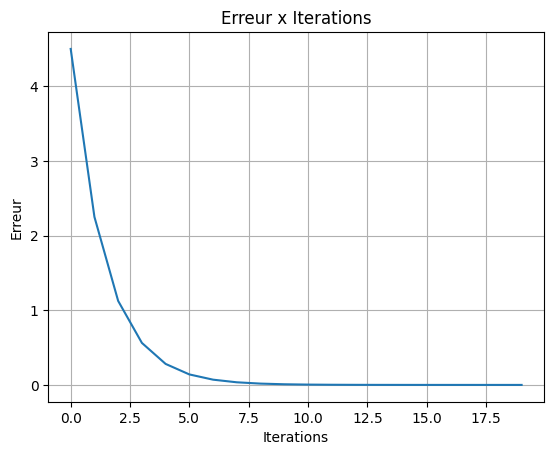

In [5]:
t = np.arange(0, 20, 1)

fig, ax = plt.subplots()
ax.plot(t, erreur)

ax.set(xlabel='Iterations', ylabel='Erreur',
       title='Erreur x Iterations')
ax.grid()

#fig.savefig("test.png")
plt.show()

### 4. Mêmes questions avec la méthode de la section dorée

 #### Méthode de la section dorée

In [6]:
def section_doree(f, interval_init, e, k):
    [a1, b1] = interval_init
    alpha = 0.618
    lambda1 = a1 + (1-alpha)*(b1 - a1)
    mi1 = a1 + alpha*(b1 - a1)
    
    ak = a1
    bk = b1
    mik = mi1
    lambdak = lambda1
    erreur = []
    
    for i in range(k):
        if (bk - ak) < e:
            return lambdak, mik, erreur

        if f(lambdak) > f(mik):
            ak = lambdak
            lambdak = mik
            mik = ak + alpha*(bk - ak)
            eu = abs(mik - (bk))
            erreur.append(eu)
        else:
            bk = mik
            mik = lambdak
            lambdak = ak + (1-alpha)*(bk - ak)
            eu = abs(lambdak - (ak))
            erreur.append(eu)
    
    return lambdak, mik, erreur

In [7]:
interval = [-3,6]
e = 10**(-3)
interactions = 20

[lambdak,mik,erreur] = section_doree(f,interval,e,interactions)
print([lambdak,mik])

[-1.000417720723541, -1.0001476967261012]


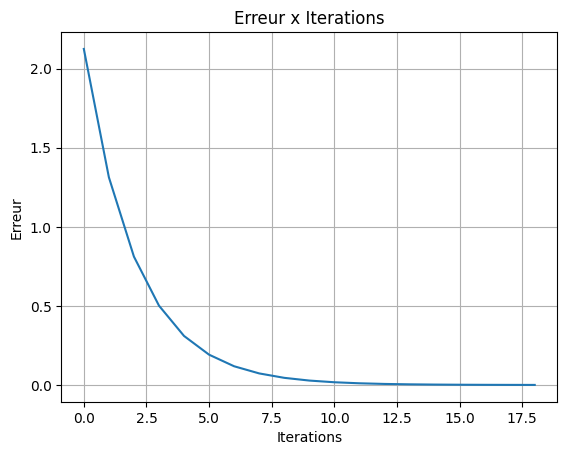

In [8]:
t = np.arange(0, np.size(erreur), 1)

fig, ax = plt.subplots()
ax.plot(t, erreur)

ax.set(xlabel='Iterations', ylabel='Erreur',
       title='Erreur x Iterations')
ax.grid()

#fig.savefig("test.png")
plt.show()

## Méthode de Newton

### 1. Programmer la méthode de Newton

In [10]:
def newton(f,e,vector,N,x0):
    x = tf.constant(x0)
    for k in range(N):
        
        with tf.GradientTape(persistent=True) as tape1:
            tape1.watch(x)
            y = f(x)

        dy_dx = tape1.gradient(y,x)
        with tf.GradientTape(persistent=True) as tape2:
            tape2.watch(x)
            dy_dx = tape1.gradient(y,x)
        
        d2y_dx2 = tape2.gradient(dy_dx,x)
        
            
        xk = x - dy_dx/d2y_dx2
        if np.abs((xk - x)/(xk)) < e:
            return xk, f(xk)
        x = xk
        
    return xk,f(xk)
        

    
    

### 2. Déterminer le minimum de la fonction en partant de x = 0.4, puis de x = 0.6 et -0.7. Qu'observer-vous ?

In [11]:
def f2(x):
    if x>0:
        return 4*x**3 - 3*x**4
    else:
        return 4*x**3 + 3*x**4
        
e = 10**(-3)
N = 20



In [12]:
x0 = 0.4
newton(f2,e,N,x0)

(<tf.Tensor: shape=(), dtype=float32, numpy=1.7092614e-07>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.9974937e-20>)

In [13]:
x0 = 0.6
newton(f2,e,N,x0)

(<tf.Tensor: shape=(), dtype=float32, numpy=0.99999994>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.0>)

In [14]:
x0 = -0.7
newton(f2,e,N,x0)

(<tf.Tensor: shape=(), dtype=float32, numpy=-1.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=-1.0>)

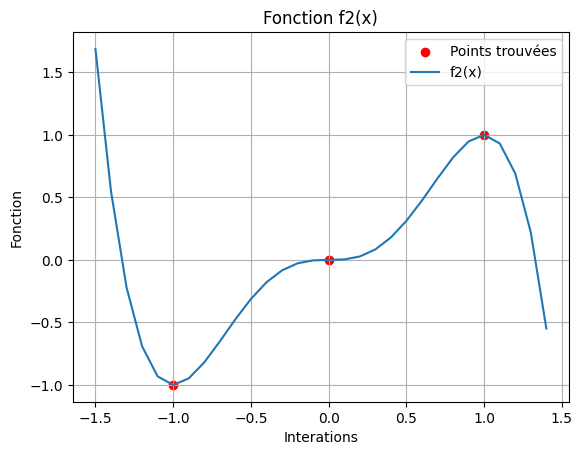

In [15]:
t = np.arange(-1.5,1.5,0.1)
y = [f2(ti) for ti in t]

t_points = [-1, 0, 1]
y_points = [f2(ti) for ti in t_points]

# Crie marcadores nos pontos especificados
plt.scatter(t_points, t_points, color='red', label='Points trouvées')

# Crie o gráfico
plt.plot(t, y, label='f2(x)')
plt.xlabel('Interations')
plt.ylabel('Fonction')
plt.title('Fonction f2(x)')
plt.legend()
plt.grid(True)

# Exiba o gráfico
plt.show()

Le méthode de Newton a trouvé le plus proche point d'inflexion en accord avec le x0. Par exemple:

- $x0 = -0.7 \rightarrow x_{trouvée} = -1$ 
- $x0 = 0.4 \rightarrow x_{trouvée} = 0$
- $x0 = 0.6 \rightarrow x_{trouvée} = 1$ 
- $x0 = 0.7 \rightarrow x_{trouvée} = 1$ 

Si on choisir une point parmi deux points d'inflexion, le méthode diverge.



In [16]:
x0 = 0.5
newton(f2,e,N,x0)

(<tf.Tensor: shape=(), dtype=float32, numpy=nan>,
 <tf.Tensor: shape=(), dtype=float32, numpy=nan>)

### 3. Même questions avec la méthode de la sécante

## Méthode de la sécante

In [17]:
def secante(f,e,N,x0,xf):
    x = tf.constant(x0)
    xk = tf.constant(xf, dtype=tf.float32)
    for k in range(N):
        
        with tf.GradientTape(persistent=True) as tape1:
            tape1.watch(x)
            y = f(x)
        
        dy_dx = tape1.gradient(y,x)
        
        del tape1
        with tf.GradientTape(persistent=True) as tape2:
            tape2.watch(xk)
            y = f(xk)
            
        dy_dxk = tape2.gradient(y,xk)
        del tape2
        xk1 = xk - (dy_dxk)*(xk - x)/(dy_dxk - dy_dx)
        
        
        if np.abs((xk1 - xk)/(xk1)) < e:
            return xk1, f(xk1)
        x = xk
        xk = xk1
        
    return xk1,f(xk1)

In [18]:
x0 = 0.4
xf = -0.3
secante(f2,e,N,x0,xf)

(<tf.Tensor: shape=(), dtype=float32, numpy=-4.7062164e-05>,
 <tf.Tensor: shape=(), dtype=float32, numpy=-4.169273e-13>)

In [19]:
x0 = 0.6
xf = 1.1
secante(f2,e,N,x0,xf)

(<tf.Tensor: shape=(), dtype=float32, numpy=0.9999917>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.0>)

In [20]:
x0 = 0.7
xf = 1.1
secante(f2,e,N,x0,xf)

(<tf.Tensor: shape=(), dtype=float32, numpy=0.9999994>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.0>)

In [21]:
x0 = -0.7
xf = -1.1
secante(f2,e,N,x0,xf)

(<tf.Tensor: shape=(), dtype=float32, numpy=-0.9999994>,
 <tf.Tensor: shape=(), dtype=float32, numpy=-1.0>)

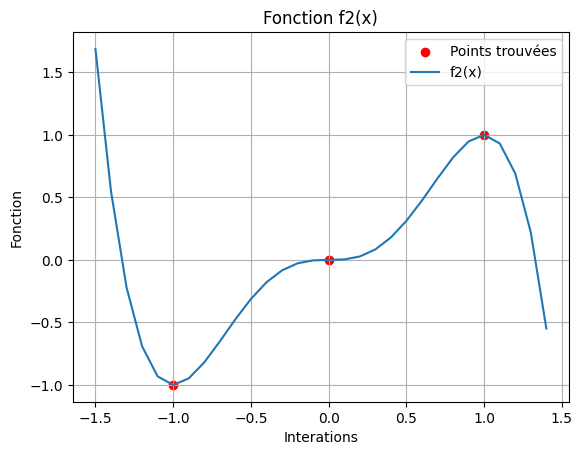

In [22]:
t = np.arange(-1.5,1.5,0.1)
y = [f2(ti) for ti in t]

t_points = [-1, 0, 1]
y_points = [f2(ti) for ti in t_points]

# Crie marcadores nos pontos especificados
plt.scatter(t_points, t_points, color='red', label='Points trouvées')

# Crie o gráfico
plt.plot(t, y, label='f2(x)')
plt.xlabel('Interations')
plt.ylabel('Fonction')
plt.title('Fonction f2(x)')
plt.legend()
plt.grid(True)

# Exiba o gráfico
plt.show()

Pour la méthode de la sécante, on doit choisir le xk en accord du point qu'on veut trouver. Par exemple, si on choisit $x0$ et $xf$ avec une grande différence parmi eux, on peut vérifier qu'il va trouver l'intermédiaire des deux ou diverger quand-même. 

In [23]:
x0 = -0.7
xf = 1.2
secante(f2,e,N,x0,xf)

(<tf.Tensor: shape=(), dtype=float32, numpy=-6.835956e-06>,
 <tf.Tensor: shape=(), dtype=float32, numpy=-1.2777783e-15>)

In [24]:
x0 = -1.1
xf = 1.1
secante(f2,e,N,x0,xf)

(<tf.Tensor: shape=(), dtype=float32, numpy=nan>,
 <tf.Tensor: shape=(), dtype=float32, numpy=nan>)